In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib import cm
from matplotlib.text import TextPath
from scipy import interpolate
from pydlv import data_reader, dl_model_3, dl_generator, dl_plotter, trajectory_plotter, data_analyser

mpl.rcParams['figure.dpi'] = 300

def get_choice_patches():
    screen_patch = mpl_patches.Rectangle((-1.1, -0.1), 2.2, 1.3, fill=False, lw=3, 
                                         edgecolor='black')
    left_patch = mpl_patches.Rectangle((-1.05, 0.85), 0.3, 0.3, fill=True, lw=1, 
                                   facecolor='white', edgecolor='black', alpha=0.2)
    right_patch = mpl_patches.Rectangle((0.75, 0.85), 0.3, 0.3, fill=True, lw=1, 
                                   facecolor='white', edgecolor='black', alpha=0.2)
    left_text = mpl_patches.PathPatch(TextPath((-1.0, 0.9), 'A', size=0.3, 
                                               backgroundcolor='white'))
    right_text = mpl_patches.PathPatch(TextPath((0.8, 0.9), 'B', size=0.3))
    
    return screen_patch, left_patch, right_patch, left_text, right_text

In [12]:
import os
from pydlv import data_reader, derivative_calculator

dr = data_reader.DataReader()
dc = derivative_calculator.DerivativeCalculator()

data = dr.read_data(path='/Users/h/Downloads/data')
# rewards_sum defines the experimental conditions to be analysed (see data description on OSF for details)
# reward sums of 12, 15 and 25 correspond to the High vs. Low condition in 7/5, 10/5 and 20/5 experiments, respectively
preproc_data = dr.preprocess_data(data, rewards_sum = [12, 15, 25])
deriv_data = dc.append_derivatives(preproc_data)


In [14]:
data.head()

t      x      y  rewards_sum  symbol  outcome  resp_time  \
subj_id trial_no                                                               
90      1           0  278.0  366.0           15       1       10       1600   
        1          30  278.0  366.0           15       1       10       1600   
        1          60  278.0  366.0           15       1       10       1600   
        1          80  278.0  366.0           15       1       10       1600   
        1         100  278.0  366.0           15       1       10       1600   

                  exp_type  high_chosen  
subj_id trial_no                         
90      1             10.0         True  
        1             10.0         True  
        1             10.0         True  
        1             10.0         True  
        1             10.0         True

In [15]:
preproc_data.head()

t         x         y  rewards_sum  symbol  outcome  \
subj_id trial_no                                                             
90      1         0.0000  0.015478 -0.017361           15       1       10   
        1         0.0106  0.020914 -0.002218           15       1       10   
        1         0.0212  0.030453  0.022210           15       1       10   
        1         0.0318  0.072128  0.119377           15       1       10   
        1         0.0424  0.113803  0.216544           15       1       10   

                  resp_time  exp_type  high_chosen  motion_time     max_d  \
subj_id trial_no                                                            
90      1               1.6      10.0         True         0.53  0.159613   
        1               1.6      10.0         True         0.53  0.159613   
        1               1.6      10.0         True         0.53  0.159613   
        1               1.6      10.0         True         0.53  0.159613   
        1               1.6      10.0         True         0.53  0.159613   

                  chng_mind  midline_d  
subj_id trial_no                        
90      1             False   0.015478  
        1             False   0.015478  
        1             False   0.015478  
        1             False   0.015478  
        1             False   0.015478

In [16]:
deriv_data.head()

t         x         y  rewards_sum  symbol  outcome  \
subj_id trial_no                                                             
90      1         0.0000  0.015478 -0.017361           15       1       10   
        1         0.0106  0.020914 -0.002218           15       1       10   
        1         0.0212  0.030453  0.022210           15       1       10   
        1         0.0318  0.072128  0.119377           15       1       10   
        1         0.0424  0.113803  0.216544           15       1       10   

                  resp_time  exp_type  high_chosen  motion_time     max_d  \
subj_id trial_no                                                            
90      1               1.6      10.0         True         0.53  0.159613   
        1               1.6      10.0         True         0.53  0.159613   
        1               1.6      10.0         True         0.53  0.159613   
        1               1.6      10.0         True         0.53  0.159613   
        1               1.6      10.0         True         0.53  0.159613   

                  chng_mind  midline_d        vx        vy          ax  \
subj_id trial_no                                                         
90      1             False   0.015478  0.423722  1.092978   45.146401   
        1             False   0.015478  1.178641  2.885361   97.291064   
        1             False   0.015478  2.376280  5.560949  128.678652   
        1             False   0.015478  3.770360  8.144654  134.355232   
        1             False   0.015478  5.341326  9.935106  162.053518   

                          ay  xflip_count  
subj_id trial_no                           
90      1         111.660119            0  
        1         226.525284            0  
        1         278.302681            0  
        1         209.188895            0  
        1         128.632298            0

In [5]:

# if not os.path.exists('csv'):
#     os.makedirs('csv')
data.to_csv('/Users/h/Downloads/data/processed_data_high_low.csv', index = False)

In [ ]:
## load data

In [7]:
data = dr.get_processed_data(path='/Users/h/Downloads/data/processed_data_high_low.csv')

In [11]:
data

,subj_id,trial_no,t,x,y,rewards_sum,symbol,outcome,resp_time,exp_type,...,motion_time,max_d,chng_mind,midline_d,vx,vy,ax,ay,xflip_count,block_no
0,90,1,0.00000,0.015478,-0.017361,15,1,10,1.600,10.0,...,0.530,0.159613,False,0.015478,0.423722,1.092978e+00,4.514640e+01,1.116601e+02,0,1
1,90,1,0.01060,0.020914,-0.002218,15,1,10,1.600,10.0,...,0.530,0.159613,False,0.015478,1.178641,2.885361e+00,9.729106e+01,2.265253e+02,0,1
2,90,1,0.02120,0.030453,0.022210,15,1,10,1.600,10.0,...,0.530,0.159613,False,0.015478,2.376280,5.560949e+00,1.286787e+02,2.783027e+02,0,1
3,90,1,0.03180,0.072128,0.119377,15,1,10,1.600,10.0,...,0.530,0.159613,False,0.015478,3.770360,8.144654e+00,1.343552e+02,2.091889e+02,0,1
4,90,1,0.04240,0.113803,0.216544,15,1,10,1.600,10.0,...,0.530,0.159613,False,0.015478,5.341326,9.935106e+00,1.620535e+02,1.286323e+02,0,1
5,90,1,0.05300,0.172145,0.325317,15,1,10,1.600,10.0,...,0.530,0.159613,False,0.015478,6.985768,1.080568e+01,1.482186e+02,3.562635e+01,0,1
6,90,1,0.06360,0.272709,0.463496,15,1,10,1.600,10.0,...,0.530,0.159613,False,0.015478,7.972756,1.035030e+01,3.800551e+01,-1.215468e+02,0,1
7,90,1,0.07420,0.363581,0.572925,15,1,10,1.600,10.0,...,0.530,0.159613,False,0.015478,7.832406,8.585116e+00,-6.448671e+01,-2.115066e+02,0,1
8,90,1,0.08480,0.439683,0.638544,15,1,10,1.600,10.0,...,0.530,0.159613,False,0.015478,6.855497,6.416077e+00,-1.198357e+02,-1.977461e+02,0,1
9,90,1,0.09540,0.515786,0.704163,15,1,10,1.600,10.0,...,0.530,0.159613,False,0.015478,5.376149,4.404411e+00,-1.592865e+02,-1.818136e+02,0,1


In [9]:
from pydlv import dl_model_3, dl_generator

model = dl_model_3.DLModel3()
dlg = dl_generator.DLGenerator(model)

fit_dl = lambda trajs: dlg.fit_dl_mult_traj(trajs, method=9)    
fit_params = data.groupby(by='subj_id').apply(fit_dl)
fit_params.index = fit_params.index.droplevel(1)

fit_params.to_csv('/Users/h/Downloads/data/fit_params_by_subject.csv', index = False)

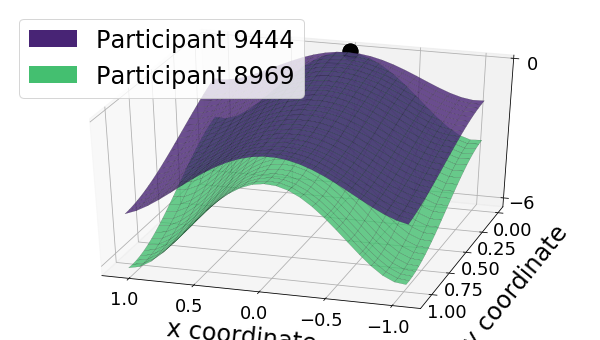

In [10]:
%matplotlib inline

from pydlv import dl_plotter
from matplotlib import cm

dlp = dl_plotter.DLPlotter(elev=33, azim=107)

subjects = [9444, 8969]
labels = ['Participant %i' % (subj_id) for subj_id in subjects]
cmap = cm.viridis
colors = [cmap(0.1), cmap(0.7)]

for i, subj_id in enumerate(subjects):
    x, y, dl = dlg.get_model_dl(fit_params.loc[subj_id][2:2+model.n_params])
    dlp.plot_surface(x, y, dl, color=colors[i], alpha=0.8)

dlp.add_legend(colors, labels)